In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2015-04-07'
end = '2025-04-07'
stock = 'GOOG'
data = yf.download (stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [6]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2015-04-07,26.651249,26.932641,26.600629,26.703856,26057345
2015-04-08,26.879042,26.990209,26.718744,26.718744,23570536
2015-04-09,26.837851,26.895916,26.575319,26.850256,31157308
2015-04-10,26.799639,26.912790,26.665643,26.912790,28189181
2015-04-13,26.757950,27.000632,26.665642,26.720233,32906096
...,...,...,...,...,...
2025-03-31,156.229996,157.130005,152.210007,154.809998,33591600
2025-04-01,158.880005,160.080002,155.255005,155.300003,20111400


In [7]:
data.reset_index(inplace=True)

In [8]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-04-07,26.651249,26.932641,26.600629,26.703856,26057345
1,2015-04-08,26.879042,26.990209,26.718744,26.718744,23570536
2,2015-04-09,26.837851,26.895916,26.575319,26.850256,31157308
3,2015-04-10,26.799639,26.912790,26.665643,26.912790,28189181
4,2015-04-13,26.757950,27.000632,26.665642,26.720233,32906096
...,...,...,...,...,...,...
2511,2025-03-31,156.229996,157.130005,152.210007,154.809998,33591600
2512,2025-04-01,158.880005,160.080002,155.255005,155.300003,20111400
2513,2025-04-02,158.860001,160.274994,156.529999,156.960007,17113300


In [9]:
ma_100_days = data.Close.rolling(100).mean()

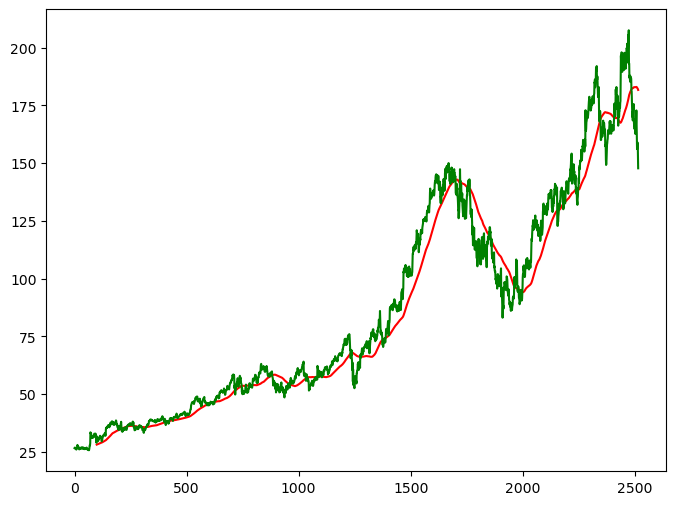

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [11]:
ma_200_days = data.Close.rolling(200).mean()

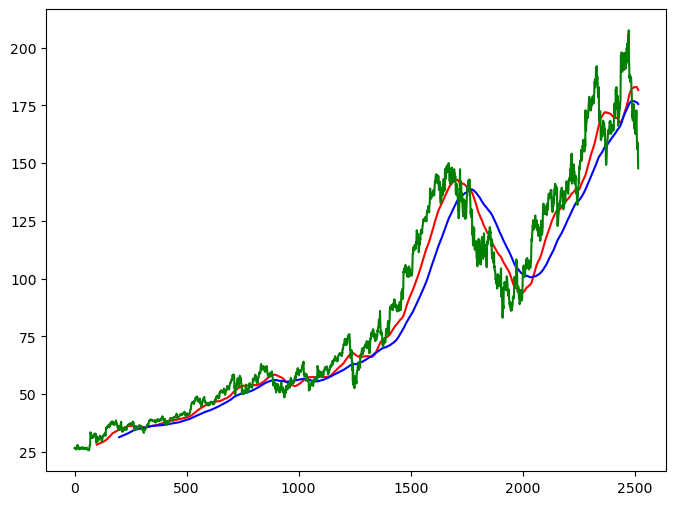

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [13]:
data.dropna(inplace=True)

In [14]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [15]:
data_train.shape[0]

2012

In [16]:
data_test.shape[0]

504

In [59]:
data_train_scale = scaler.fit_transform(data_train)

In [60]:
x = []
y = []
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [20]:
x,y = np.array(x),np.array(y)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, 
               input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [24]:
model.fit(x,y,epochs = 50,batch_size = 32 , verbose = 1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 30s 270ms/step - loss: 0.0836
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - loss: 0.0080
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - loss: 0.0075
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 247ms/step - loss: 0.0061
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 259ms/step - loss: 0.0062
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 266ms/step - loss: 0.0058
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - loss: 0.0063
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 253ms/step - loss: 0.0058
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - loss: 0.0046
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 272ms/step - loss: 0.0052
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - loss: 0.0048
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 273ms/step - loss: 0.0043
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 283ms/step - loss: 0.0044
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - loss: 0.0038
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [26]:
pas_100_days = data_train.tail(100)

In [27]:
data_test = pd.concat([pas_100_days,data_test],ignore_index = True)

In [28]:
data_test_scale = scaler.fit_transform(data_test)

In [63]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x = np.array(x)
y = np.array(y)

# Predict
y_predict = model.predict(x)

# Inverse Transform
y_predict = scaler.inverse_transform(y_predict)
y_original = scaler.inverse_transform(y.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step


In [64]:
1/scaler.scale_

array([124.27885437])

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Scaling your training data
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)

# Prepare x, y for training (already done by you)

# After model prediction on test data
y_predict = model.predict(x)

# Inverse scaling of predicted and original values
y_predict = scaler.inverse_transform(y_predict)
y_original = scaler.inverse_transform(y.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step


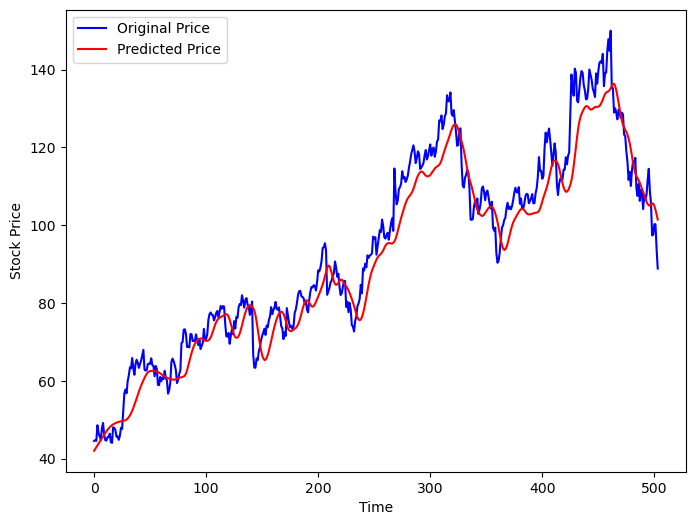

In [66]:
plt.figure(figsize=(8,6))
plt.plot(y_original, 'b', label='Original Price')
plt.plot(y_predict, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()